In [3]:
%matplotlib inline

In [5]:
import pandas as pd
import pandas_profiling
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

In [6]:
beers = pd.DataFrame.from_csv('d:\\code\\craft_scraping\\data\\processed\\'
                              'beers.csv', encoding='latin1')
breweries = pd.DataFrame.from_csv('d:\\code\\craft_scraping\\data\\processed\\'
                              'beers.csv', encoding='latin1')
beers_and_breweries = pd.merge(beers, 
                               breweries, 
                               how='inner', 
                               left_on="brewery_id", 
                               right_on="id", 
                               sort=True,
                               suffixes=('_beer', '_brewery'))

In [8]:
beers.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [9]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

In [10]:
print_categories(beers)

abv :  Numerical
ibu :  Numerical
id :  Numerical
name :  Categorical
style :  Categorical
brewery_id :  Numerical
ounces :  Numerical


In [11]:
print_categories(breweries)

abv :  Numerical
ibu :  Numerical
id :  Numerical
name :  Categorical
style :  Categorical
brewery_id :  Numerical
ounces :  Numerical


In [12]:
length = len(beers["ibu"])
length

2410

In [13]:
count = beers["ibu"].count()
print(count)

1405


In [14]:
number_of_missing_values = length - count
pct_of_missing_values = float(number_of_missing_values / length)
pct_of_missing_values = "{0:.1f}%".format(pct_of_missing_values*100)
print(pct_of_missing_values)

41.7%


In [15]:
print("Minimum value: ", beers["ibu"].min())
print("Maximum value: ", beers["ibu"].max())

Minimum value:  4.0
Maximum value:  138.0


In [16]:
print(beers["ibu"].mode())

0    20.0
dtype: float64


In [17]:
beers["ibu"].mean()

42.713167259786474

In [18]:
beers["ibu"].median()

35.0

In [19]:
beers["ibu"].std()

25.954065911259317

In [20]:
beers["ibu"].quantile([.25, .5, .75])

0.25    21.0
0.50    35.0
0.75    64.0
Name: ibu, dtype: float64

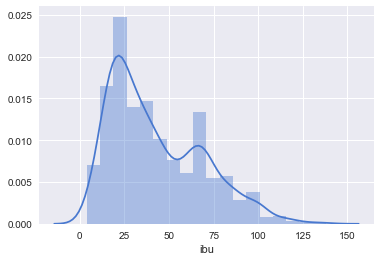

In [23]:
sns.distplot(beers["ibu"].dropna());

In [24]:
beers[["abv", "ibu", "ounces"]].corr()

,abv,ibu,ounces
abv,1.000000,0.670621,0.172529
ibu,0.670621,1.000000,0.054691
ounces,0.172529,0.054691,1.000000


In [25]:
beers[["name", "style"]].describe()

,name,style
count,2410,2405
unique,2305,99
top,Nonstop Hef Hop,American IPA
freq,12,424


In [26]:
pandas_profiling.ProfileReport(beers_and_breweries).to_file(outputfile="./pandas_profilin_report.html")